<a href="https://colab.research.google.com/github/EphemeralAnarchist/ASL_Translator/blob/main/ASLTranslator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')
dir_path = "gdrive/MyDrive/Colab Notebooks/dataset"


Mounted at /content/gdrive


In [ ]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/MyDrive/Colab Notebooks/dataset/amer_sign2.png
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test.csv
gdrive/MyDrive/Colab Notebooks/dataset/american_sign_language.PNG
gdrive/MyDrive/Colab Notebooks/dataset/amer_sign3.png
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_train.csv
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_train/sign_mnist_train.csv
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test/sign_mnist_test.csv
gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test/ASL_A.jpg


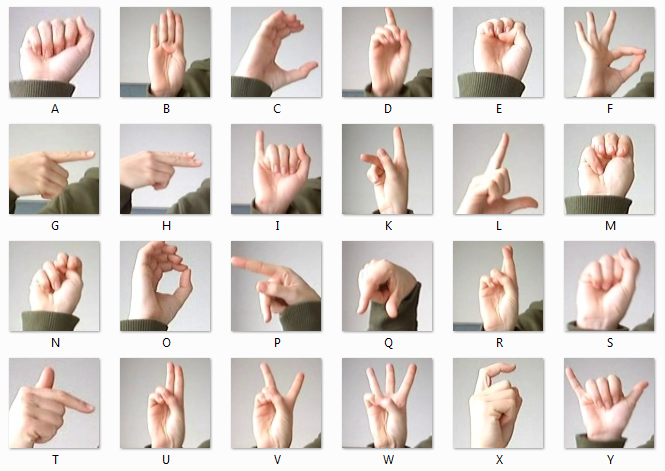

In [ ]:
from IPython.display import Image
Image('gdrive/MyDrive/Colab Notebooks/dataset/amer_sign2.png')

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_train.csv')
test = pd.read_csv('gdrive/MyDrive/Colab Notebooks/dataset/sign_mnist_test.csv')

In [ ]:
print(train.shape)
print(test.shape)


(27455, 785)
(7172, 785)


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

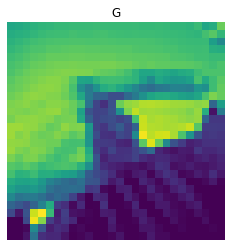

In [ ]:
#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

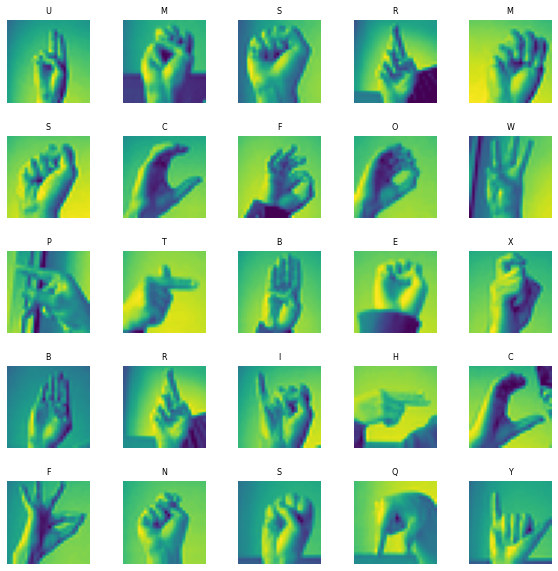

In [ ]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

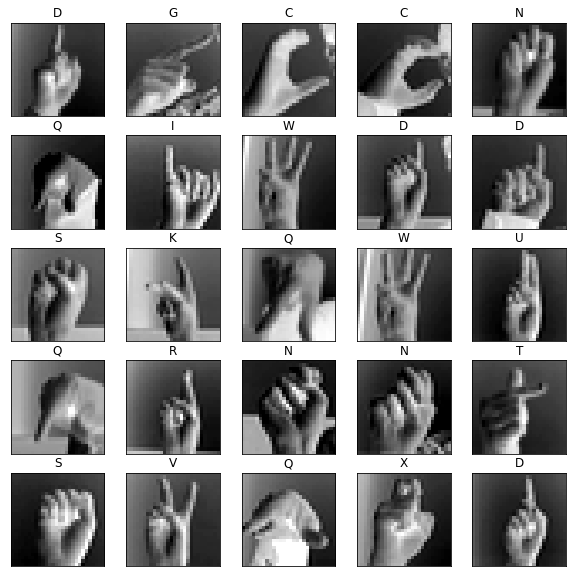

In [ ]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [ ]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [ ]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


### CNN

In [ ]:
!pip install keras

In [ ]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from keras.optimizers import Adam
from keras.optimizers import adam_v2
# optimizer = adam_v2.Adam(learning_rate=lr, decay=lr/epochs)
# Model.compile(loss='--',  optimizer=optimizer  , metrics=['--'])
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [ ]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [ ]:
#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 32s 700ms/step - loss: 3.1663 - accuracy: 0.0592 - val_loss: 3.0387 - val_accuracy: 0.0952
Epoch 2/50
43/43 [==============================] - 19s 434ms/step - loss: 2.6379 - accuracy: 0.1828 - val_loss: 2.1068 - val_accuracy: 0.3437
Epoch 3/50
43/43 [==============================] - 32s 758ms/step - loss: 1.8995 - accuracy: 0.3737 - val_loss: 1.4176 - val_accuracy: 0.5950
Epoch 4/50
43/43 [==============================] - 19s 435ms/step - loss: 1.3689 - accuracy: 0.5416 - val_loss: 0.9338 - val_accuracy: 0.7221
Epoch 5/50
43/43 [==============================] - 18s 429ms/step - loss: 1.0498 - accuracy: 0.6406 - val_loss: 0.6657 - val_accuracy: 0.8039
Epoch 6/50
43/43 [==============================] - 19s 446ms/step - loss: 0.8310 - accuracy: 0.7177 - val_loss: 0.4881 - val_accuracy: 0.8634
Epoch 7/50
43/43 [==============================] - 20s 470ms/step - loss: 0.6825 - accuracy: 0.7643 - val_loss: 0.3660 - val_accuracy: 0.8982

Text(0.5, 1.0, 'Accuracy evolution')

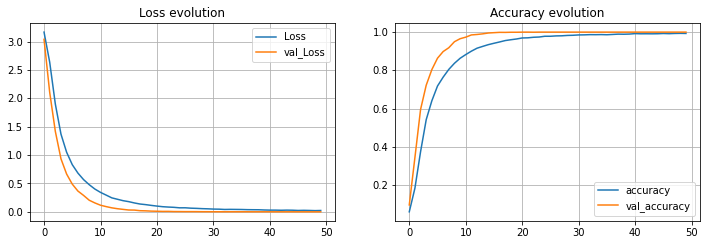

In [ ]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
#Predictions for the test data
# predicted_classes = cnn_model.predict_classes(X_test)
predict_x=cnn_model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)
predicted_classes=np.argmax(predict_x,axis=1)

In [ ]:
X_test[0].shape

(28, 28, 1)

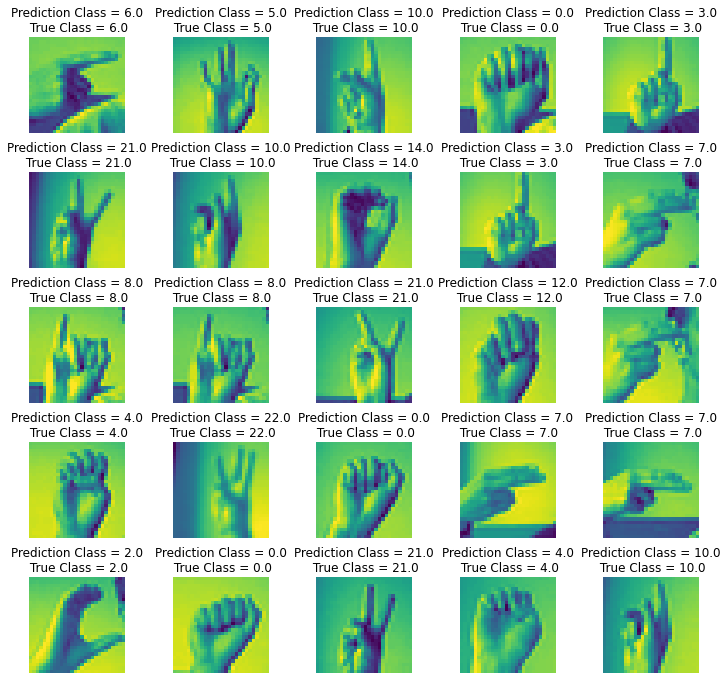

In [ ]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

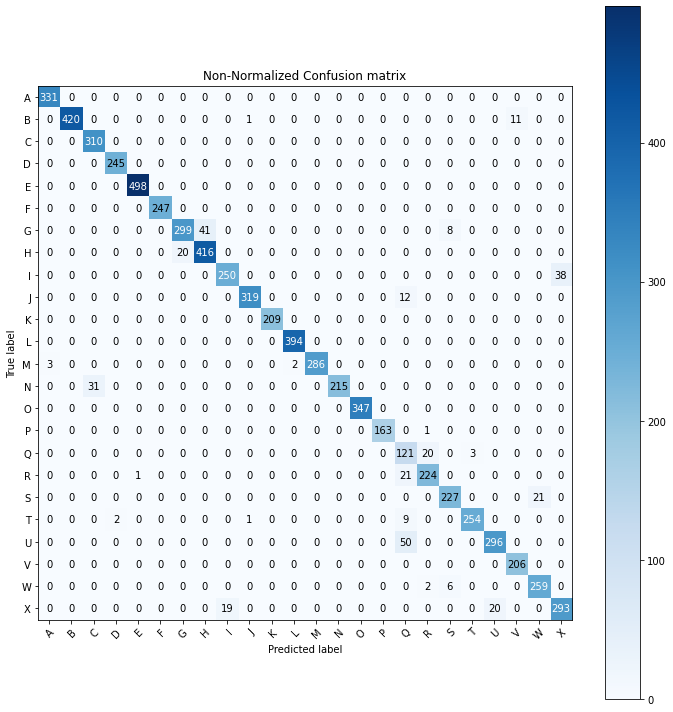

In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

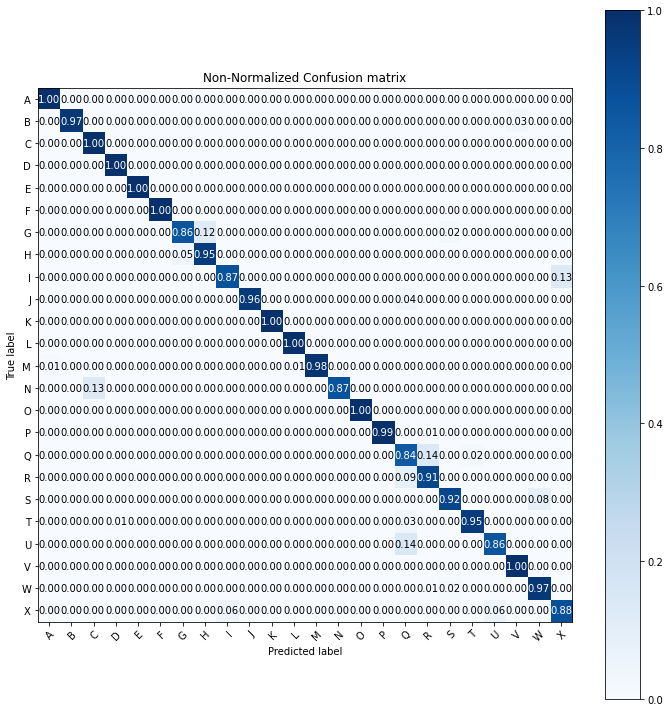

In [ ]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Non-Normalized Confusion matrix')
plt.show()

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.952175125488009


###Prediction

In [ ]:
!wget https://thumbs.dreamstime.com/b/asl-hand-shape-sign-language-sign-language-hand-shape-letter-asl-blank-background-188410370.jpg

--2022-04-25 19:57:09--  https://thumbs.dreamstime.com/b/asl-hand-shape-sign-language-sign-language-hand-shape-letter-asl-blank-background-188410370.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24592 (24K) [image/jpeg]
Saving to: ‘asl-hand-shape-sign-language-sign-language-hand-shape-letter-asl-blank-background-188410370.jpg’

asl-hand-shape-sign 100%[===================>]  24.02K  --.-KB/s    in 0s      

2022-04-25 19:57:09 (167 MB/s) - ‘asl-hand-shape-sign-language-sign-language-hand-shape-letter-asl-blank-background-188410370.jpg’ saved [24592/24592]



In [ ]:
!wget https://media.istockphoto.com/photos/-picture-id177133596?k=20&m=177133596&s=612x612&w=0&h=132I_l1PrKP_xdB9fw_4iiWF-xRYKhqJeS1qKFKECg8=

--2022-04-25 21:13:58--  https://media.istockphoto.com/photos/-picture-id177133596?k=20
Resolving media.istockphoto.com (media.istockphoto.com)... 13.225.147.23, 13.225.147.45, 13.225.147.93, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|13.225.147.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68269 (67K) [image/jpeg]
Saving to: ‘-picture-id177133596?k=20’

-picture-id17713359 100%[===================>]  66.67K  --.-KB/s    in 0.008s  

2022-04-25 21:13:58 (7.84 MB/s) - ‘-picture-id177133596?k=20’ saved [68269/68269]



In [ ]:
#capturing image
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from PIL import Image


# cam = cv2.VideoCapture(0)
# result, image = cam.read()
# img1 = cv2.imread('./asl-hand-shape-sign-language-sign-language-hand-shape-letter-asl-blank-background-188410370.jpg')
#img1 = image.load_img('./asl-hand-shape-sign-language-sign-language-hand-shape-letter-asl-blank-background-188410370.jpg', target_size = (28, 28))
img1 = image.load_img('./testp.jpg', target_size = (28,28))
# img1 = Image.open('./asl-hand-shape-sign-language-sign-language-hand-shape-letter-asl-blank-background-188410370.jpg').convert('L')
##img1 = img1.resize((28,28))

# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# img=np.array(image, dtype='float32')
img = np.array(img1).reshape( 28, 28, 3)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
##img = np.expand_dims(img, 2)
# img = img/544
# img = img/255
# img = img.resize(28,28)
# img.reshape((1000, 28,28))


# cv2_imshow(img)
plt.gray()
#plt.imshow(img.reshape((28,28)))
#img.reshape((28,28))

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

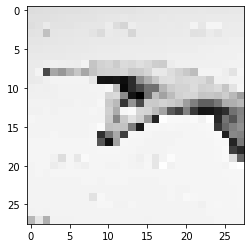

In [ ]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

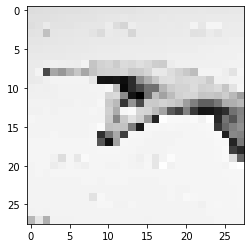

In [ ]:
img.shape
imgarr=np.array(grayscale_image.reshape(1,28,28,1))
imgarr.shape
plt.imshow(imgarr[0].reshape((28,28)))

In [ ]:
#Predictions for the actual data
predict_img=cnn_model.predict(imgarr)
predicted=np.argmax(predict_img,axis=1)
print(class_names[predicted[0]])

Y
